In [55]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

<h1>Linear Damage</h1>

In [28]:
df = pd.read_csv('input/results_complete_linear.csv')

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['damage'], axis=1), df['damage'], test_size=0.10, random_state=41)

In [57]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
%%time
path = 'models/linear_reg'
if (os.path.exists(path)):
    model = keras.models.load_model(path)
else:
    model = keras.Sequential()
    model.add(keras.Input(shape=(127)))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal())) #80
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(1, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.summary()
    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))
    history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test)) #1000 epocas
    model.save(path)

CPU times: total: 156 ms
Wall time: 279 ms


In [32]:
pd.DataFrame(history.history).to_csv('output/history_mlp_linear.csv')

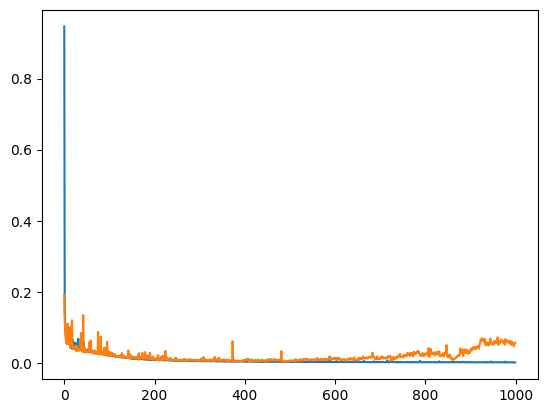

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

<h3>MAPE</h3>

In [59]:
pred = model.predict(X_test)

81/81 [==============================] - 0s 893us/step


In [60]:
mean_absolute_percentage_error(y_test, pred)

0.20562454774974845

<h3>R2</h3>

In [36]:
r2_score(y_test, pred)

0.31029828601332154

<h3>Cosine Similarity</h3>

In [37]:
print(np.dot(y_test.values, pred)/(np.linalg.norm(y_test.values)*np.linalg.norm(pred)))

[0.92267315]


<h3>Visualization</h3>

In [61]:
result = pd.DataFrame()
result['y'] = y_test.values
result['pred'] = pred
result = result.sort_values(by=['y']).reset_index(drop=True)
result.to_csv('output\\mlp_linear_reg.csv', index=False)

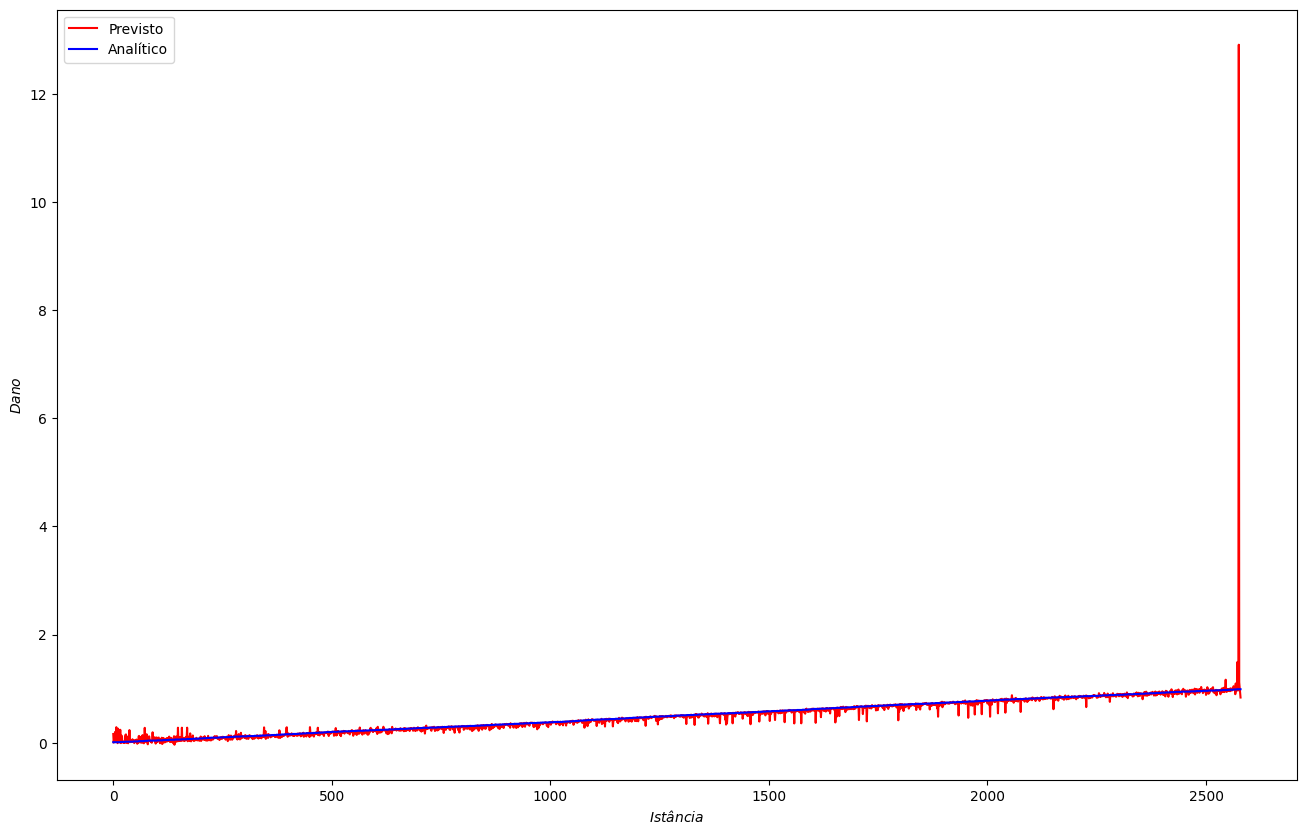

In [62]:
plt.figure(figsize=(16,10))
plt.plot(result['pred'], 'r')
plt.plot(result['y'], 'b')
plt.xlabel("$Istância$",)
plt.ylabel("$Dano$",)
plt.legend(['Previsto', 'Analítico'])
plt.show()

<h1>Exponential Damage</h1>

In [63]:
df_exp = pd.read_csv('input/results_complete_exponential.csv')

In [64]:
X_train, X_test, y_train, y_test = train_test_split(df_exp.drop(['damage'], axis=1), df_exp['damage'], test_size=0.10, random_state=41)

In [65]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
%%time
path = 'models/exp_reg'
if (os.path.exists(path)):
    model = keras.models.load_model(path)
else:
    model = keras.Sequential()
    model.add(keras.Input(shape=(127)))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal())) #80
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(1, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.summary()
    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))
    history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test)) #1000 epocas
    model.save(path)

CPU times: total: 125 ms
Wall time: 269 ms


In [67]:
pred = model.predict(X_test)

81/81 [==============================] - 0s 919us/step


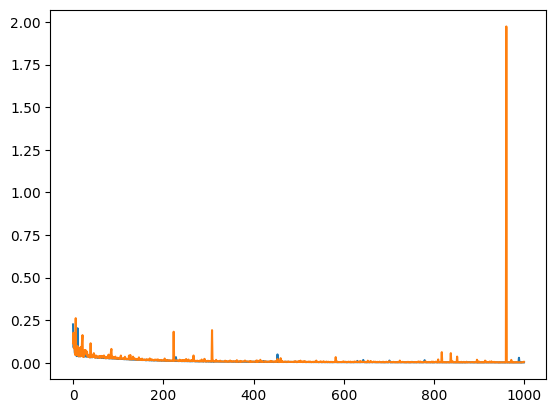

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

<h3>MAPE</h3>

In [68]:
mean_absolute_percentage_error(y_test, pred)

0.2204088022519149

<h3>R2</h3>

In [69]:
r2_score(y_test, pred)

0.9252287189165544

<h3>Cosine Similarity</h3>

In [70]:
print(np.dot(y_test.values, pred)/(np.linalg.norm(y_test.values)*np.linalg.norm(pred)))

[0.99481385]


<h3>Visualization</h3>

In [71]:
result = pd.DataFrame()
result['y'] = y_test.values
result['pred'] = pred
result = result.sort_values(by=['y']).reset_index(drop=True)
result.to_csv('output\\mlp_exp_reg.csv', index=False)

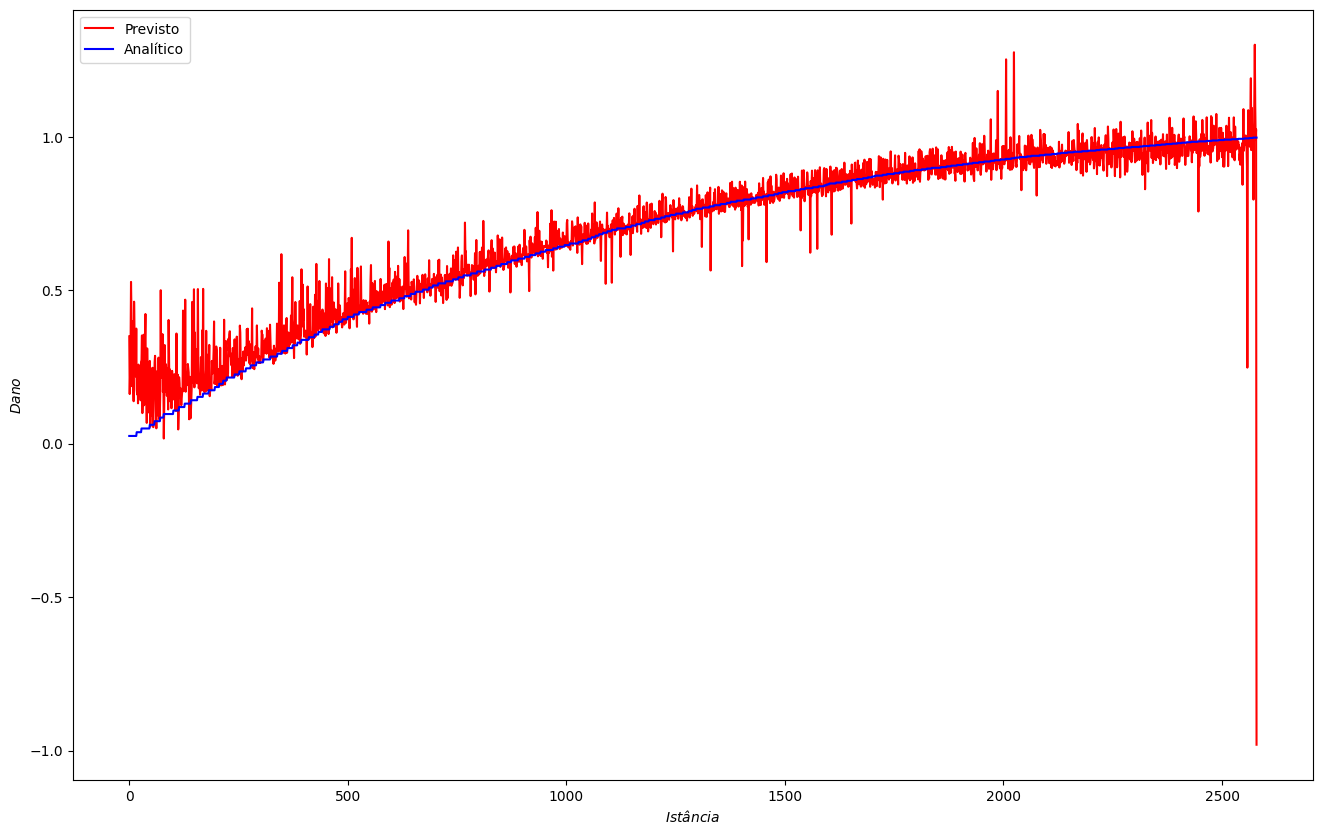

In [72]:
plt.figure(figsize=(16,10))
plt.plot(result['pred'], 'r')
plt.plot(result['y'], 'b')
plt.xlabel("$Istância$",)
plt.ylabel("$Dano$",)
plt.legend(['Previsto', 'Analítico'])
plt.show()

<h1>Sigmoid-like Damage</h1>

In [73]:
df_sig = pd.read_csv('input/results_complete_sigmoid_like.csv')

In [74]:
X_train, X_test, y_train, y_test = train_test_split(df_sig.drop(['damage'], axis=1), df_sig['damage'], test_size=0.05, random_state=41)

In [75]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
%%time
path = 'models/sig_reg'
if (os.path.exists(path)):
    model = keras.models.load_model(path)
else:
    model = keras.Sequential()
    model.add(keras.Input(shape=(127)))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal())) #80
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(1, activation=tf.keras.layers.LeakyReLU(alpha=0.5)))
    model.summary()
    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))
    history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test)) #1000 epocas
    model.save(path)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 80)                10240     
                                                                 
 dense_25 (Dense)            (None, 80)                6480      
                                                                 
 dense_26 (Dense)            (None, 80)                6480      
                                                                 
 dense_27 (Dense)            (None, 1)                 81        
                                                                 
Total params: 23,281
Trainable params: 23,281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
766/766 [==============================] - 1s 1ms/step - loss: 0.3473 - val_loss: 0.0896
Epoch 2/1000
766/766 [==============================] - 1s 1ms/step - loss: 0.24

INFO:tensorflow:Assets written to: models/sig_reg\assets


INFO:tensorflow:Assets written to: models/sig_reg\assets


CPU times: total: 4min 25s
Wall time: 15min 38s


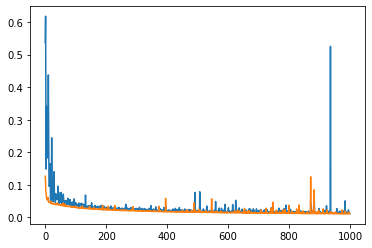

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [77]:
pred = model.predict(X_test)

41/41 [==============================] - 0s 781us/step


<h3>MAPE</h3>

In [78]:
mean_absolute_percentage_error(y_test, pred)

8.902650210041385

<h3>R2</h3>

In [79]:
r2_score(y_test, pred)

0.9178626087711521

<h3>Cosine Similarity</h3>

In [80]:
print(np.dot(y_test.values, pred)/(np.linalg.norm(y_test.values)*np.linalg.norm(pred)))

[0.98494766]


<h3>Visualization</h3>

In [81]:
result = pd.DataFrame()
result['y'] = y_test.values
result['pred'] = pred
result = result.sort_values(by=['y']).reset_index(drop=True)
result.to_csv('output\\mlp_sig_reg.csv', index=False)

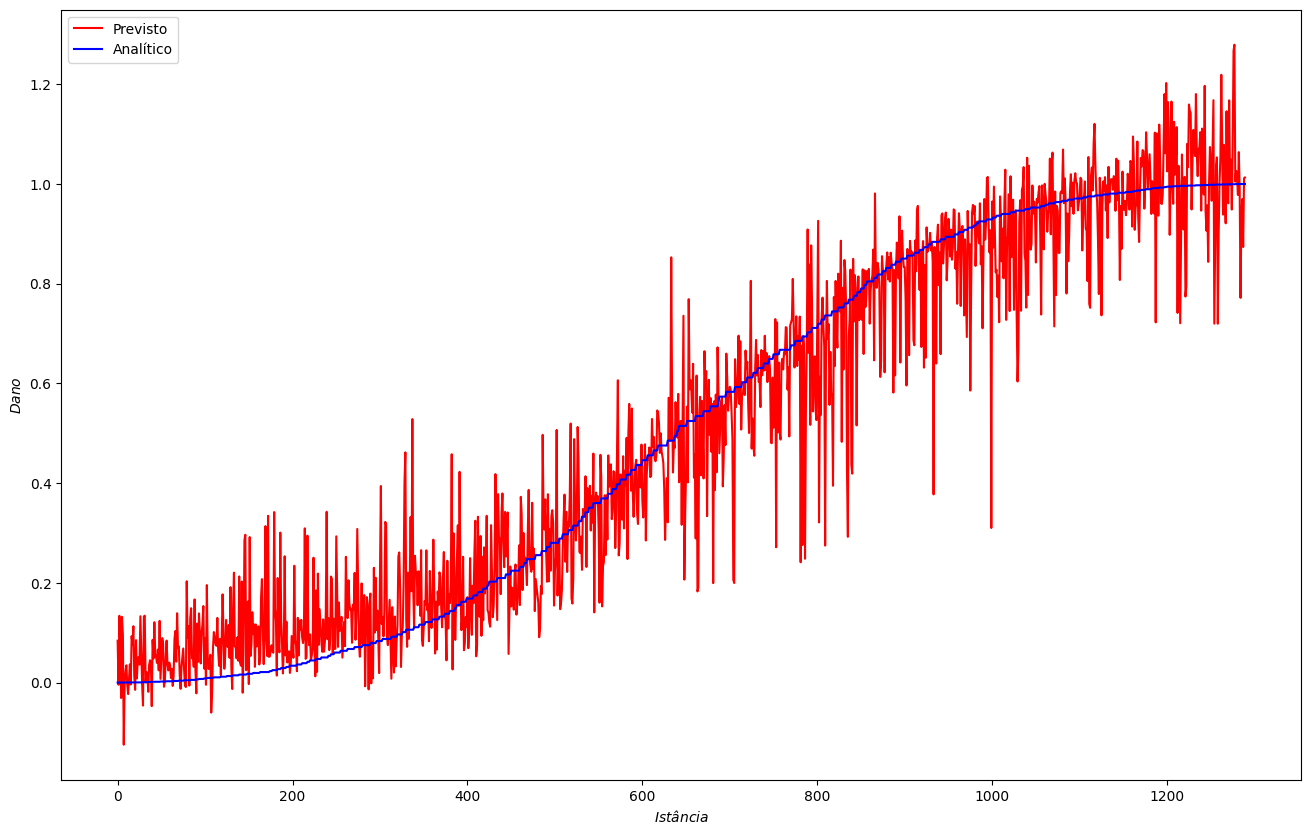

In [82]:
plt.figure(figsize=(16,10))
plt.plot(result['pred'], 'r')
plt.plot(result['y'], 'b')
plt.xlabel("$Istância$",)
plt.ylabel("$Dano$",)
plt.legend(['Previsto', 'Analítico'])
plt.show()